# Loans Data Exploration

## Preliminary Wrangling

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# importing the necessary packages
import pandas as pd
import numpy as np
import seaborn as sb
import random
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
# load the data into the working environment
loan_df = pd.read_csv('prosperLoanData.csv')

In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
loan_df.shape

(113937, 81)

**Note** : This dataframe has 81 variables, so I will only choose a number of them to analyze and work with.

In [5]:
# selecting some variables from the original dataframe
df = loan_df[['ListingKey', 'ListingNumber', 'Term', 'LoanStatus','BorrowerAPR', 'BorrowerRate', 'LenderYield',
              'ProsperRating (Alpha)', 'ProsperScore','ListingCategory (numeric)', 'BorrowerState', 'OnTimeProsperPayments',
              'Occupation','EmploymentStatus', 'EmploymentStatusDuration','AvailableBankcardCredit','AmountDelinquent',
              'CurrentDelinquencies','IsBorrowerHomeowner', 'IncomeRange', 'StatedMonthlyIncome','LoanOriginalAmount',
              'LoanOriginationDate','LoanOriginationQuarter','MonthlyLoanPayment', 'Recommendations', 'Investors']]

In [6]:
df

,ListingKey,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),...,CurrentDelinquencies,IsBorrowerHomeowner,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,Recommendations,Investors
0,1021339766868145413AB3B,193129,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,0,...,2.0,True,"$25,000-49,999",3083.333333,9425,2007-09-12 00:00:00,Q3 2007,330.43,0,258
1,10273602499503308B223C1,1209647,36,Current,0.12016,0.0920,0.0820,A,7.0,2,...,0.0,False,"$50,000-74,999",6125.000000,10000,2014-03-03 00:00:00,Q1 2014,318.93,0,1
2,0EE9337825851032864889A,81716,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,0,...,1.0,False,Not displayed,2083.333333,3001,2007-01-17 00:00:00,Q1 2007,123.32,0,41
3,0EF5356002482715299901A,658116,36,Current,0.12528,0.0974,0.0874,A,9.0,16,...,4.0,True,"$25,000-49,999",2875.000000,10000,2012-11-01 00:00:00,Q4 2012,321.45,0,158
4,0F023589499656230C5E3E2,909464,36,Current,0.24614,0.2085,0.1985,D,4.0,2,...,0.0,True,"$100,000+",9583.333333,15000,2013-09-20 00:00:00,Q3 2013,563.97,0,20
5,0F05359734824199381F61D,1074836,60,Current,0.15425,0.1314,0.1214,B,10.0,1,...,0.0,True,"$100,000+",8333.333333,15000,2013-12-24 00:00:00,Q4 2013,342.37,0,1
6,0F0A3576754255009D63151,750899,36,Current,0.31032,0.2712,0.2612,E,2.0,1,...,0.0,False,"$25,000-49,999",2083.333333,3000,2013-04-18 00:00:00,Q2 2013,122.67,0,1
7,0F1035772717087366F9EA7,768193,36,Current,0.23939,0.2019,0.1919,C,4.0,2,...,0.0,False,"$25,000-49,999",3355.750000,10000,2013-05-13 00:00:00,Q2 2013,372.60,0,1
8,0F043596202561788EA13D5,1023355,36,Current,0.07620,0.0629,0.0529,AA,9.0,7,...,0.0,True,"$25,000-49,999",3333.333333,10000,2013-12-12 00:00:00,Q4 2013,305.54,0,1
9,0F043596202561788EA13D5,1023355,36,Current,0.07620,0.0629,0.0529,AA,11.0,7,...,0.0,True,"$25,000-49,999",3333.333333,10000,2013-12-12 00:00:00,Q4 2013,305.54,0,1


In [7]:
df.shape

(113937, 27)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 27 columns):
ListingKey                   113937 non-null object
ListingNumber                113937 non-null int64
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
LenderYield                  113937 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
BorrowerState                108422 non-null object
OnTimeProsperPayments        22085 non-null float64
Occupation                   110349 non-null object
EmploymentStatus             111682 non-null object
EmploymentStatusDuration     106312 non-null float64
AvailableBankcardCredit      106393 non-null float64
AmountDelinquent             106315 non-null float64
Cur

**Notes**:
    1. `ListingCategory (numeric)` column : The numeric values can be mapped into written categories as provided in the data dictionary.
    2. `LoanOriginationQuarter` column: can be split into two separate columns; `Quarter` and `Year`.
    3. `LoanOriginationDate` column: change the data type to datetime

**`ListingCategory (numeric)` column : The numeric values can be mapped into written categories as provided in the data dictionary.**

In [9]:
listing_category = {0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement',3: 'Business',
4: 'Personal Loan',5: 'Student Use',6: 'Auto',7: 'Other',8: 'Baby&Adoption',9: 'Boat',10: 'Cosmetic Procedure',
11: 'Engagement Ring',12: 'Green Loan',13: 'Household Expenses',14: 'Large Purchases',15: 'Medical/Dental',
16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation',20: 'Wedding Loans'}

In [10]:
def listingcategory(df):
    if df['ListingCategory (numeric)'] in listing_category.keys():
        category = listing_category[df['ListingCategory (numeric)']]
        return category
    else:
        return df['ListingCategory (numeric)']
    
df['ListingCategory'] = df.apply(listingcategory, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


**`LoanOriginationQuarter` column: can be split into two separate columns; `Quarter` and `Year`.**

In [11]:
df['Quarter'] = df['LoanOriginationQuarter'].apply(lambda x : x.split()[0])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
df['Year'] = df['LoanOriginationQuarter'].apply(lambda x : x.split()[1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


**`LoanOriginationDate` column: change the data type to datetime**

In [13]:
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
print(df.describe())

       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  ProsperScore  ListingCategory (numeric)  \
count  113937.000000  84853.000000              113937.000000   
mean        0.182701      5.950067                   2.774209   
std         0.074516      2.376501                   3.996797   
min        -0.010000      1.000000                   0.000000   
25%         0.124200      4.000000                   

### Dateset Structure
This loan dataset contains 113,937 loans with 81 variables providing different information about the loan including loan amount, interest rate, loan status and much more. I will only be analyzing a small group of these variables which I extracted in a separate dataframe for easier analysis.

### Reseach Focus
I will focus my analysis on the different factors that affects the outcome of the loan, and how the interest rate associates with other variables. Another area I will be covering is what factors impact the loan amount.

### Features of Interest
I think the borrower rate (interest rate) will have a major effect on the loan status as well as the lender yield: the higher the interest rate, the higher the yield. I also expect the prosper score to be correlated with the loan's interest rate.

## Univariate Exploration

I will start by looking at the distribution of the main variables of interest.

In [15]:
basecolor = sb.color_palette()[0]

In [16]:
# convert Prosper Rating into ordered categorical type
prosper_rating_levels = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'N/A']
prosper_ordered = pd.api.types.CategoricalDtype(ordered = True, categories = prosper_rating_levels)
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(prosper_ordered)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [17]:
# the distribution of different loan status
loanstatus_order = df.LoanStatus.value_counts()
loanstatus_order

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [18]:
n_loans = df.shape[0]

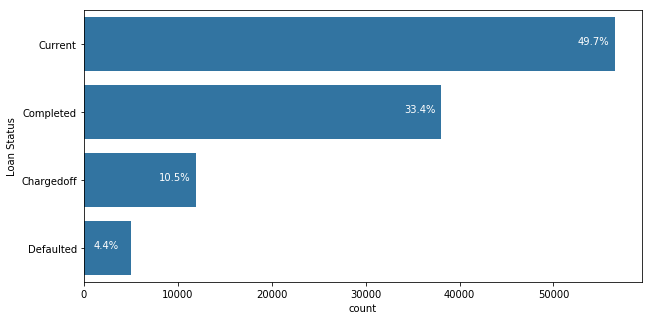

In [19]:
# plotting the predominent loan status
plt.figure(figsize = (10,5))
loanstatus_order = df.LoanStatus.value_counts()
sb.countplot(data = df, y = 'LoanStatus', color = basecolor, order = loanstatus_order.index[:4])
plt.ylabel('Loan Status')
locs, labels = plt.yticks()
for loc, label in zip(locs, labels):
    c = loanstatus_order[label.get_text()]
    s =  '{:0.1f}%'.format(100 * (c / n_loans))
    plt.text(c - 4000 , loc, s, color = 'w')

approximately one third of all loans' payments have been **completed**, while about 50% of them are still **current**.
Throughout the analysis, I will focus on only those 4 loan status since they represent about 98% of all loan outcomes.

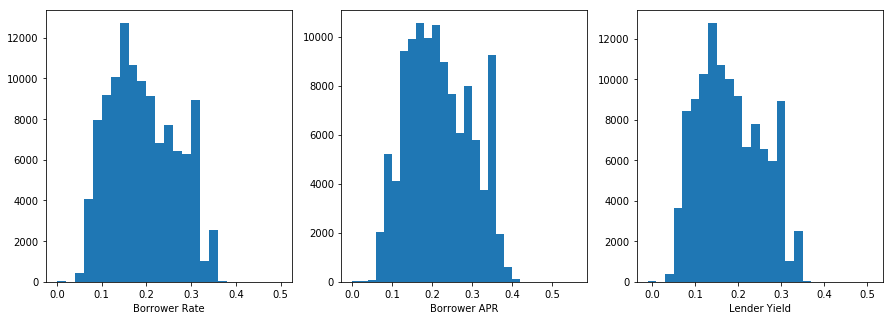

In [20]:
# Examining the distribution of borrower rate, lender yield, and borrower APR
plt.figure(figsize = (15, 5))
plt.subplot(1,3,1)
bin_e = np.arange(0, 0.5 + 0.02, 0.02)
plt.hist(data = df, x = 'BorrowerRate', bins = bin_e)
plt.xlabel('Borrower Rate')
plt.subplot(1,3,2)
bin_e = np.arange(0, 0.55 + 0.02, 0.02)
plt.hist(data = df, x = 'BorrowerAPR', bins = bin_e)
plt.xlabel('Borrower APR')
plt.subplot(1,3,3)
bin_e = np.arange(-0.01, 0.5 + 0.02, 0.02)
plt.hist(data = df, x = 'LenderYield', bins = bin_e)
plt.xlabel('Lender Yield');

An almost identical theme is observed among the three variables; a distribution that looks roughly normal with one peak between 0.1 and 0.2, and sudden jump in frequency just above 0.3 which is abruptly cut off rather than a gradual drop in frequency.
The borrower APR covers a slightly wider range than the Borrower Rate since it accounts for loan fees.

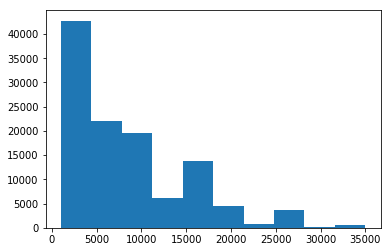

In [21]:
# the distribution of the original amounts of loans
plt.hist(data =df, x = 'LoanOriginalAmount');

The distribution is highly skewed to the right. Using a log scale can solve this issue.

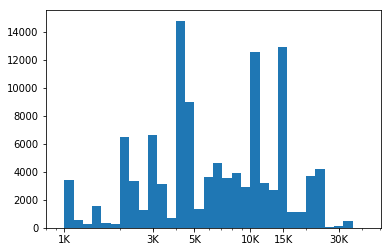

In [22]:
# the distribution of the original amounts of loans on a log scale
bin_e = 10 ** np.arange(3, 5 + 0.05, 0.05)
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bin_e)
plt.xscale('log')
plt.xlim(10 ** 2.9, 10**4.7)
ticks = [1000, 3000, 5000, 10000, 15000, 30000]
plt.xticks(ticks, ['1K', '3K','5K','10K','15K','30K']);

plotting the loan original amounts on a linear scale resulted in a highly skewed distribution. however, when a log scale is used, The distribution looks somewhat normal with one peak around 4K. There is also a sudden spike in frequency around 10K and 15K marks.

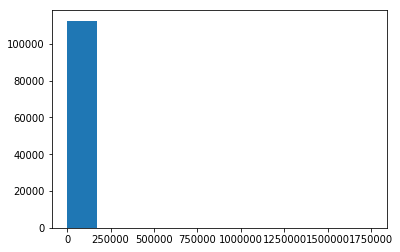

In [23]:
# the distribution of the stated monthly income
plot_data = df[df.StatedMonthlyIncome != 0]
plt.hist(data = plot_data, x = 'StatedMonthlyIncome');

The distribution is highly skewed to the right. Using a log scale is more convenient.

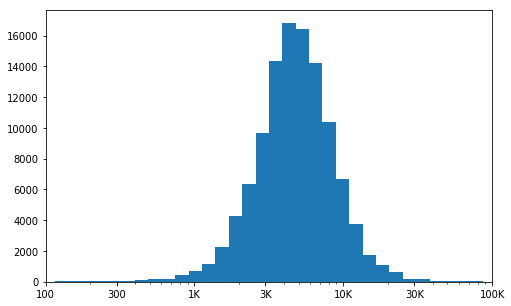

In [24]:
# there is a long tail in the above distribution, so log scale is more convenient.
plt.figure(figsize = (8,5))
bin_e = 10 ** np.arange(-1, 6.5 + 0.09, 0.09)
plt.hist(data = plot_data, x = 'StatedMonthlyIncome', bins = bin_e)
plt.xscale('log')
plt.xlim(10** 2, 10**5)
ticks = [100, 300, 1000, 3000, 10000, 30000, 100000]
plt.xticks(ticks, [100, 300, '1K', '3K', '10K', '30K', '100K']);

the distribution of the borrowers' monthly income was highly skewed to the right with most of the incomes on the low end of the scale and just a few on the high end. After applying a logarithmic transformation, the distribution looks normally distributed with one peak between four and seven thousand dollars.

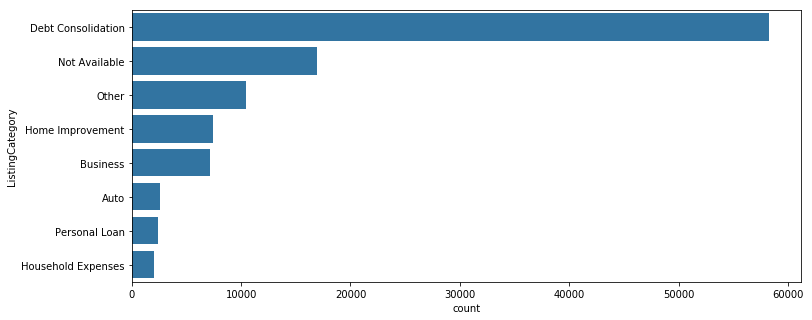

In [25]:
# the distribution of the listing category (the main reasons for taking a loan)
listingcategory_order = df.ListingCategory.value_counts()
plt.figure(figsize = (12, 5))
sb.countplot(data = df, y = 'ListingCategory', color = basecolor, order = listingcategory_order.index[:8]);

From the above visual, Debt consolidation is by far the most common reason borrowers take loans.

### Summarization of the Univariate Exploration
1. About one third of borrowers successfuly completed their loan payments, while approximately 50% of loans are still current.
2. The distributions of Borrower APR, Borrower Rate and Lender Yield are all normal and an almost identical trend is shared amongst them.
3. On linear scale, the distribution of the loan original amounts was highly skewed to the right. Using a log scale resulted in a somewhat normal distribution with one peak at 4K.
4. Similarly, the distibution of the monthly income of borrowers was very skewed to the right with most of the data on the low end of the scale. After using a log scale, the distribution looked normal peaking between 4K and 7K marks.
5. Debt consolidation is the main reason of why borrowers take loans.

## Bivariate Exploration

I will start the Bivariate Exploration by examining the bivariate correlations between some numeric variables in the dataset.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


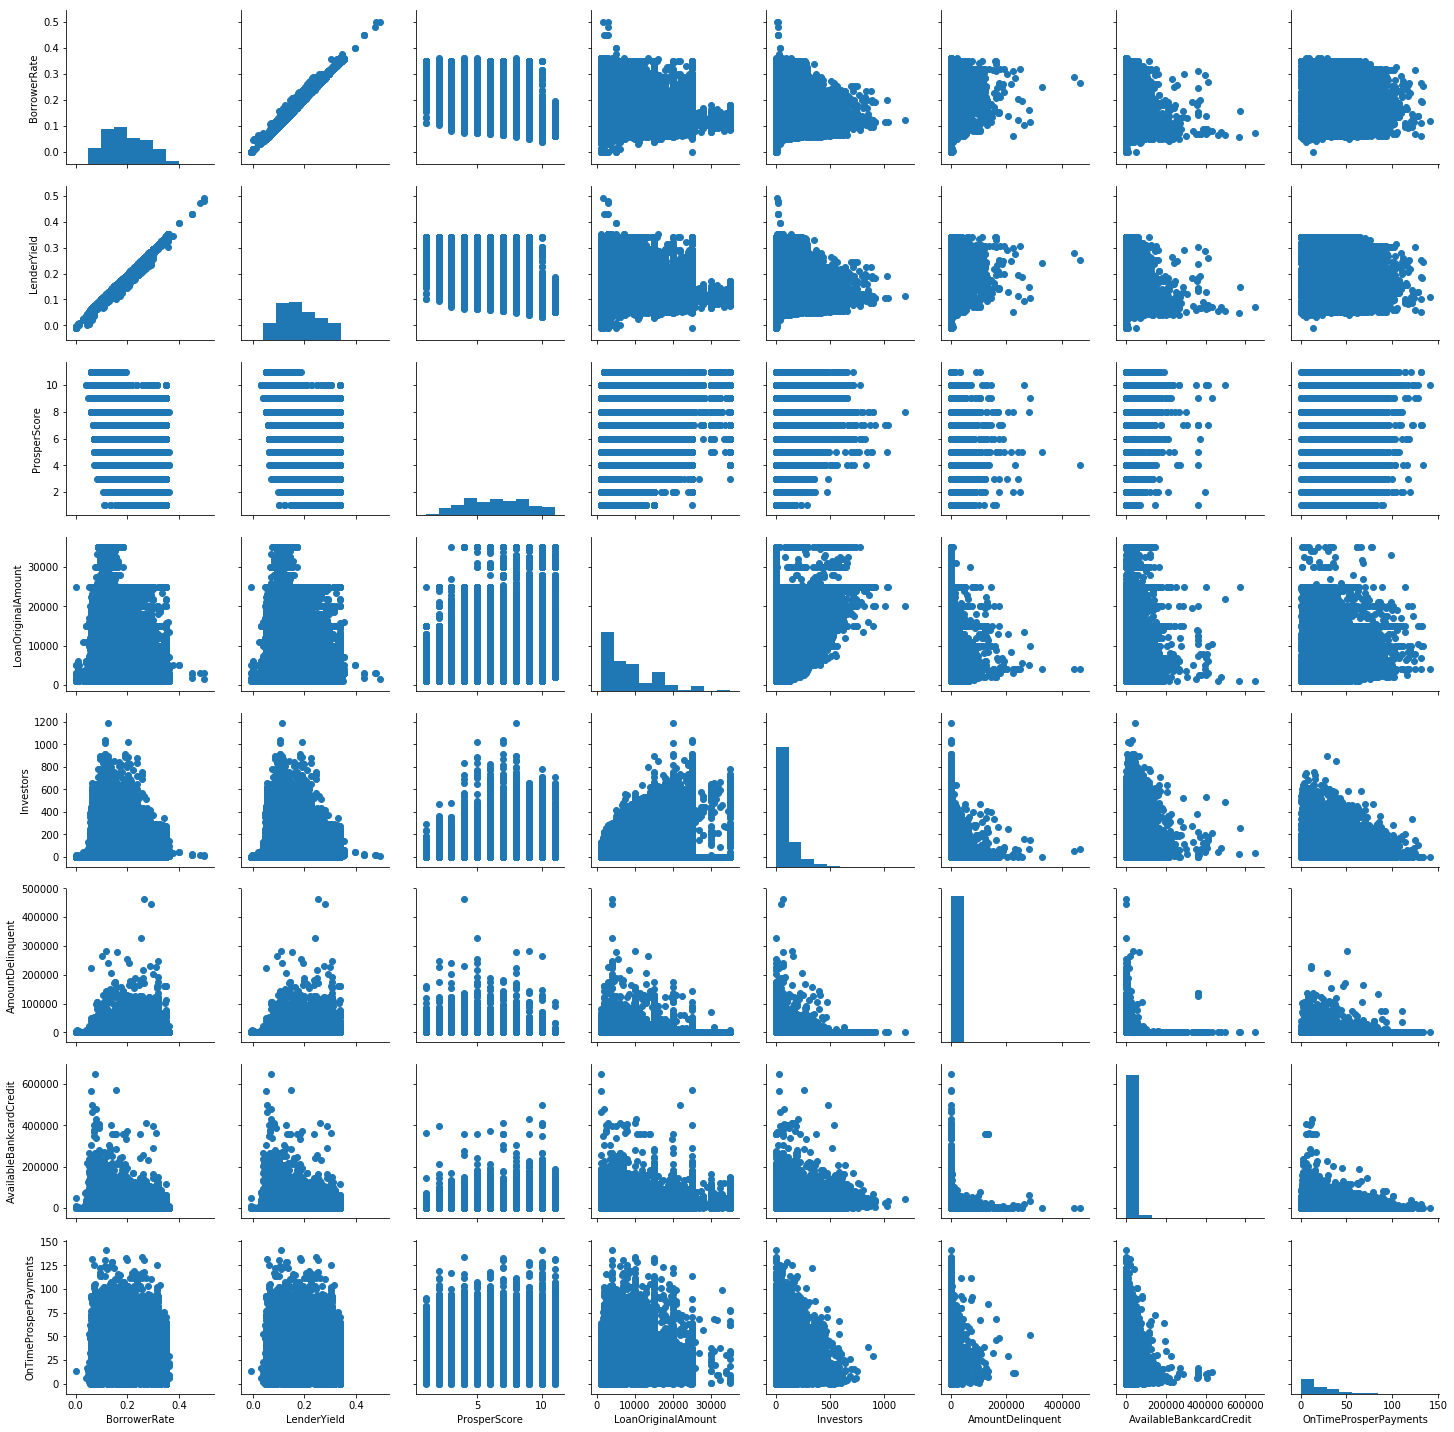

In [26]:
cols = ['BorrowerRate', 'LenderYield', 'ProsperScore', 'LoanOriginalAmount', 'Investors','AmountDelinquent',
        'AvailableBankcardCredit', 'OnTimeProsperPayments']
g = sb.PairGrid(data = df, vars = cols)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

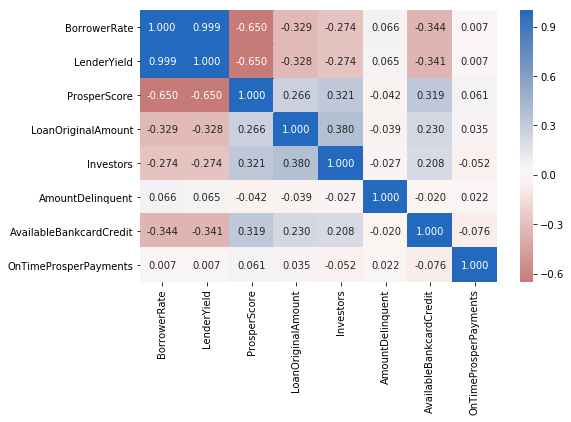

In [27]:
plt.figure(figsize = [8, 5])
sb.heatmap(df[cols].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

The initial Examination of the pairwise correlations between numeric variables reveals, as expected, a strong positive relationship between Borrower Rate (loan interest) and Lender Yield.
Also, the borrower rate and the lender yield are negatively correlated with both the prosper score and the amount of loan.
in addition, increasing the number of investors that funded the loan is correlated with less interest rates and a higher prosper scores and ratings.

Now, I will go through each of the interesting correlations one by one.

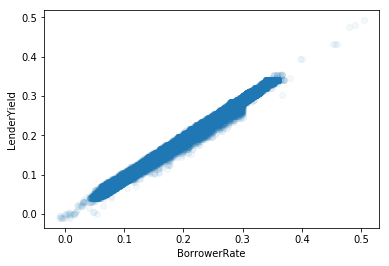

In [28]:
# the relationship between borrower rate and lender yield
sb.regplot(data = df, x = 'BorrowerRate', y = 'LenderYield', fit_reg = False, scatter_kws = {'alpha' : 1/20}
           , x_jitter = 0.01);

There is a strong positive linear relationship between the loan interest and the lender yield which is to be expected.

**How does the average loan amount affects the loan average rate and lender yield?**

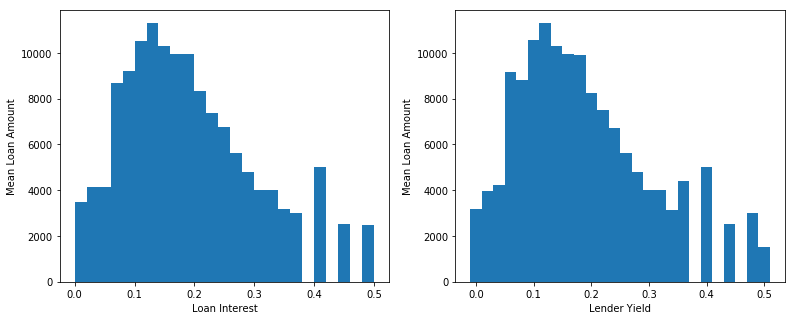

In [29]:
plt.figure(figsize = (13, 5))
plt.subplot(1,2,1)
bin_e = np.arange(0, 0.5 + 0.02, 0.02)
borrower_rate_binned = pd.cut(df['BorrowerRate'], bins = bin_e, right = False, include_lowest = True,
                              labels = False).astype(int)
pts_per_bin = df.groupby(borrower_rate_binned).size()
loan_wt = df['LoanOriginalAmount'] / pts_per_bin[borrower_rate_binned].values
plt.hist(data = df, x = 'BorrowerRate', bins = bin_e, weights = loan_wt)
plt.xlabel('Loan Interest')
plt.ylabel('Mean Loan Amount')
plt.subplot(1,2,2)
bin_e = np.arange(-0.01, 0.5 + 0.02, 0.02)
lender_yield_binned = pd.cut(df['LenderYield'], bins = bin_e, right = False, include_lowest = True,
                              labels = False).astype(int)
pts_per_bin = df.groupby(lender_yield_binned).size()
loan_wt = df['LoanOriginalAmount'] / pts_per_bin[lender_yield_binned].values
plt.hist(data = df, x = 'LenderYield', bins = bin_e, weights = loan_wt)
plt.xlabel('Lender Yield')
plt.ylabel('Mean Loan Amount');

The adapted histograms above shows that both loan interest and lender yield are both negatively correlated with the original loan amount as the amount of loan increase, this causes the loan interest rate to decrease which in turn decreases the lender yield.

**What are the factors that have an impact on the outcome of the loan?**

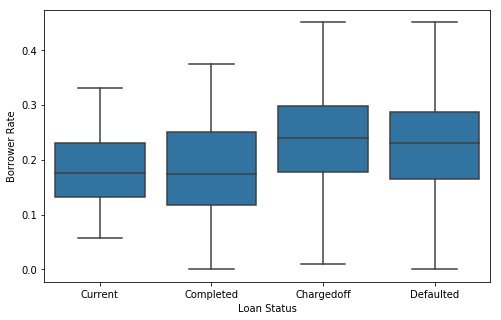

In [30]:
# I will depict the relationship between the loan interest rate and the loan status
plt.figure(figsize = (8,5))
sb.boxplot(data = df, x = 'LoanStatus', y = 'BorrowerRate', color = basecolor, showfliers = False, 
          order = loanstatus_order.index[:4])
plt.xlabel('Loan Status')
plt.ylabel('Borrower Rate');

The box plot clearly shows that borrowers who has taken loans with less interest rates have either completed their payments or their loan is still currents with no payments are past due.
loans with higher interest rates, however, have either been charged off or defaulted.

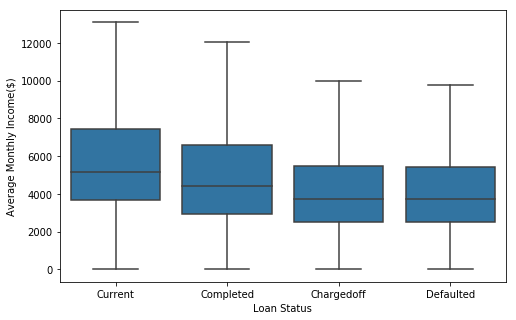

In [31]:
# Now I will look at the relationship between the borrower's monthly income and his loan status
plt.figure(figsize = (8,5))
sb.boxplot(data = df, x = 'LoanStatus', y = 'StatedMonthlyIncome', color = basecolor, showfliers = False, 
          order = loanstatus_order.index[:4])
plt.xlabel('Loan Status')
plt.ylabel('Average Monthly Income($)');

The results of the above visual is kind of intuitive as borrowers with a higher monthly income have either completed their loans' payments or their loans are still currents with no missed payments. borrowers with lower monthly income on the other hand have failed to keep up with thir loan payments.

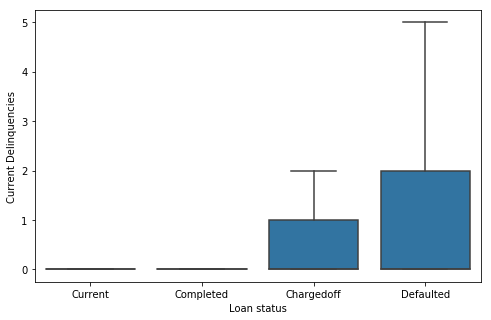

In [32]:
# the relationship between the borrower's current delinquencies and his loan status
plt.figure(figsize = (8,5))
sb.boxplot(data = df, x = 'LoanStatus', y = 'CurrentDelinquencies', color = basecolor, showfliers = False, 
          order = loanstatus_order.index[:4])
plt.xlabel('Loan status')
plt.ylabel('Current Delinquencies');

The box plot shows that borrowers with less current delinquencies were more able to complete their loans or to keep up with their payments. In contrast, borrowers with higher delinquencies couldn't complete their loans' payments.

**What effect does the prosper scores and ratings have on the loan interest rate and lender yield?**

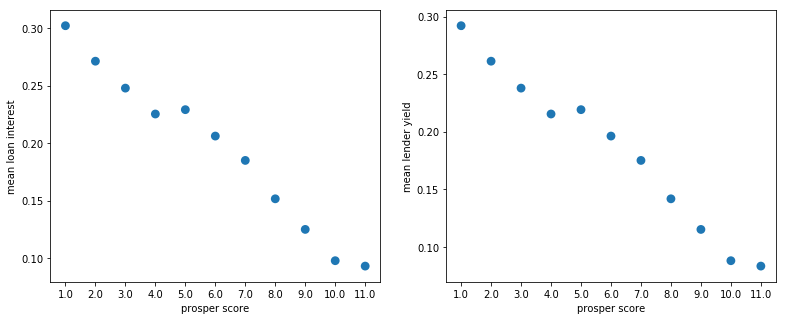

In [33]:
# this figure depicts the relationship between the prosper score and the loan interest rate as well as the lender yield
plt.figure(figsize = (13, 5))
plt.subplot(1,2,1)
sb.pointplot(data = df, x = 'ProsperScore', y = 'BorrowerRate', linestyles = "")
plt.xlabel('prosper score')
plt.ylabel('mean loan interest')
plt.subplot(1,2,2)
sb.pointplot(data = df, x = 'ProsperScore', y = 'LenderYield', linestyles = "")
plt.xlabel('prosper score')
plt.ylabel('mean lender yield');

The point plots show a negative correlation between the prosper score and the loan interest and lender yield. Borrowers with a higher prosper score get loans with a lower interest rates which in turn results in a lower lender yield.

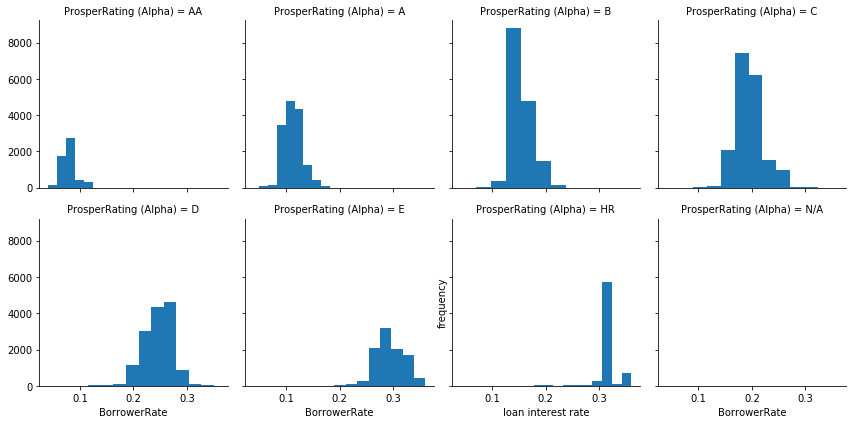

In [34]:
# the distribution of the loan interest rate across the levels of the prosper ratings.
g = sb.FacetGrid(data = df, col = 'ProsperRating (Alpha)', col_wrap = 4)
g.map(plt.hist, 'BorrowerRate')
plt.xlabel('loan interest rate')
plt.ylabel('frequency');

This facet plot emphasizes what we have seen in the previous plots, as the prosper rating increases, the borrower rate (loan interest rate) drops in a commensurate manner.

**Does the borrower's prosper score affect the amount of loan that he receives?**/

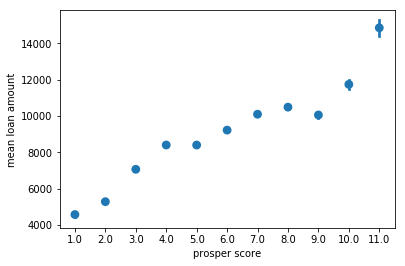

In [35]:
# This visual depicts the correlation between the prosper score of the borrowers and the average amount of loans.
sb.pointplot(data = df, x = 'ProsperScore', y = 'LoanOriginalAmount', linestyles = '')
plt.xlabel('prosper score')
plt.ylabel('mean loan amount');

There is a positive correlation between the prosper score and the loan amount as borrower with a higher prosper score are more likely to recieve a higher loan amounts.

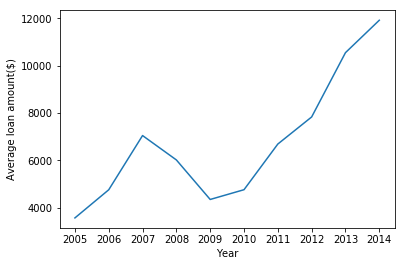

In [36]:
# the change of the average loan amounts over time
mean_loan_amount = df.groupby('Year')['LoanOriginalAmount'].mean()
plt.errorbar(x = mean_loan_amount.index, y = mean_loan_amount.values)
plt.xlabel('Year')
plt.ylabel('Average loan amount($)');

The average loan amounts have increased over the time period in the data set from around 4000 dollars in 2005 to over 11000 dollars in 2014.

**Does the number of recommendations have any effect on the loan interest rate?**

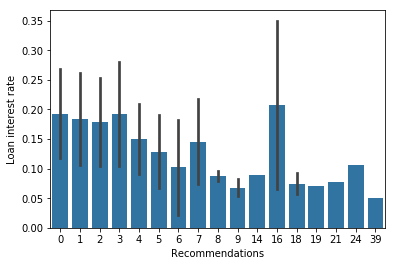

In [37]:
sb.barplot(data = df, x = 'Recommendations', y = 'BorrowerRate', color = basecolor, ci = 'sd')
plt.ylabel('Loan interest rate');

Borrowers with more recommendations received loans with less interest rates, but this is associated with higher variation among values.

### Summarization of the Bivariate Exploration
1. Loan interest rates and Lender Yields, both of which are positively correlated, have a negative relationship with average loan amounts and prosper scores.
2. Average loan amounts are positively correlated with prosper score.
3. Having a lower borrower rate (loan interest rate) is associated with borrowers being more able to complete or keep up with their payments. Also, increasing the monthly income of borrowers is associated with their ability to complete their loans.
4. The average loan amounts have increased over the time span in the dataset.

## Multivariate Exploration

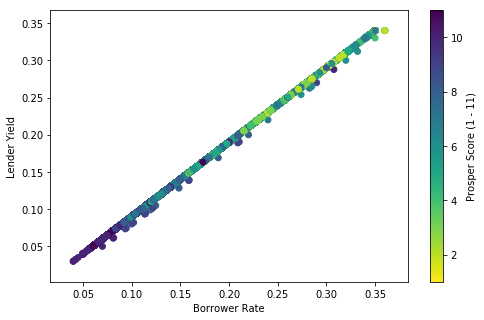

In [38]:
#compare the prosper score to the borrower rate and lender yield
plt.figure(figsize = (8,5))
plt.scatter(data = df, x = 'BorrowerRate', y = 'LenderYield', c = 'ProsperScore', cmap = 'viridis_r')
plt.colorbar(label = 'Prosper Score (1 - 11)')
plt.xlabel('Borrower Rate')
plt.ylabel('Lender Yield');

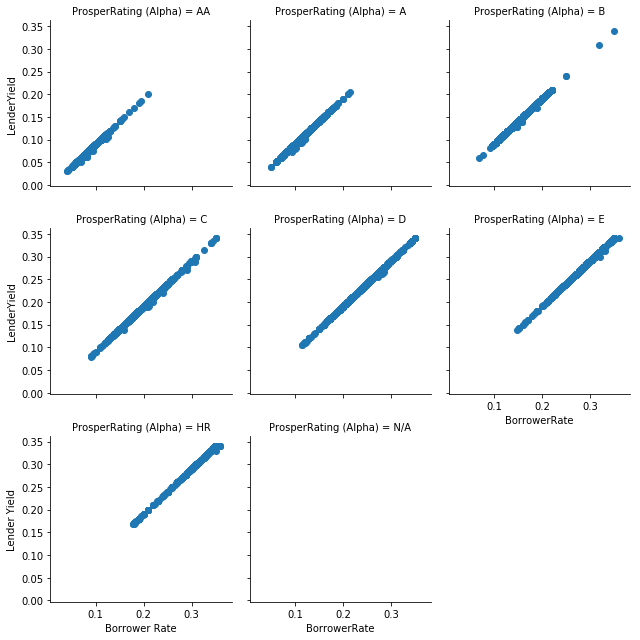

In [39]:
#facting the scatter plot of borrower rate vs. lender yield using the levels of prosper rating
g = sb.FacetGrid(data = df, col = 'ProsperRating (Alpha)', col_wrap = 3)
g.map(plt.scatter, 'BorrowerRate', 'LenderYield')
plt.xlabel('Borrower Rate')
plt.ylabel('Lender Yield');

This facet plot emphasizes the positive correlation between the borrower rate and the lender yield, and how both of them are negatively correlated with the prosper score and rating.

### Summarization of the Multivariate Exploration
depicting the relation ship between the loan interest rate and the lender yield and then faceting across the levels of prosper ratings augmented what we have found in the bivariate exploration.
There is a direct and positive correlation between the loan interest rate and the lender yield, which is to be expected. However, both of them are negatively related to the prosper score and rating.
Borrowers with a higher prosper scores received loans with lower interest rate and that in turn generated less profit for the lender.